In [19]:
import os


print("Saved models:", [f for f in os.listdir() if f.endswith(".pkl")])


Saved models: ['decision_tree_model.pkl', 'gradient_boosting_model.pkl', 'logistic_regression_model.pkl', 'random_forest_model.pkl', 'support_vector_machine_model.pkl', 'xgboost_model.pkl']


In [25]:
import joblib
import numpy as np


X_test_scaled = np.load("X_test_scaled.npy")
y_test = np.load("y_test.npy")


model_names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Naïve Bayes",
    "Support Vector Machine",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "XGBoost"
]


loaded_models = {}


for name in model_names:
    filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    loaded_models[name] = joblib.load(filename)

print("All models loaded successfully.")




All models loaded successfully.


In [21]:
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


X_train_scaled = np.load("X_train_scaled.npy")
y_train = np.load("y_train.npy")


missing_models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naïve Bayes": GaussianNB()
}

for name, model in missing_models.items():
    if f"{name.replace(' ', '_').lower()}_model.pkl" not in os.listdir():
        model.fit(X_train_scaled, y_train)  
        best_models[name] = model  


for name, model in best_models.items():
    filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, filename)

print("All models saved successfully.")


All models saved successfully.


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    results = {
        "Training Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        "ROC-AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:,1])  # Use probabilities
    }
    
    return results


model_results = {}
for name, model in best_models.items():
    model_results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)


import pandas as pd
results_df = pd.DataFrame(model_results).T
print(results_df)



                        Training Accuracy  Test Accuracy  Precision    Recall  \
Logistic Regression              0.850000       0.850000   0.867347  0.858586   
Random Forest                    1.000000       0.861111   0.849057  0.909091   
Support Vector Machine           0.888889       0.866667   0.857143  0.909091   
Gradient Boosting                0.925000       0.877778   0.859813  0.929293   
K-Nearest Neighbors              0.879167       0.855556   0.854369  0.888889   
Naïve Bayes                      0.833333       0.827778   0.861702  0.818182   

                        F1 Score   ROC-AUC  
Logistic Regression     0.862944  0.910712  
Random Forest           0.878049  0.930415  
Support Vector Machine  0.882353  0.926799  
Gradient Boosting       0.893204  0.921250  
K-Nearest Neighbors     0.871287  0.925677  
Naïve Bayes             0.839378  0.903853  


In [29]:

model_predictions = {}

for name, model in loaded_models.items():
  
    y_pred = model.predict(X_test_scaled)
    
   
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_proba = None 

  
    model_predictions[name] = {
        "y_pred": y_pred,
        "y_pred_proba": y_pred_proba
    }

print("Predictions generated for all models.")


Predictions generated for all models.


In [31]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


evaluation_results = {}


for name, preds in model_predictions.items():
    y_pred = preds["y_pred"]
    y_pred_proba = preds["y_pred_proba"]

  
    results = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    }

   
    evaluation_results[name] = results


eval_df = pd.DataFrame(evaluation_results).T


print("\nModel Evaluation Results:")
print(eval_df)



Model Evaluation Results:
                        Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression     0.850000   0.867347  0.858586  0.862944  0.910712
K-Nearest Neighbors     0.855556   0.854369  0.888889  0.871287  0.925677
Naïve Bayes             0.827778   0.861702  0.818182  0.839378  0.903853
Support Vector Machine  0.866667   0.857143  0.909091  0.882353  0.926799
Decision Tree           0.822222   0.845361  0.828283  0.836735  0.875296
Random Forest           0.861111   0.849057  0.909091  0.878049  0.930415
Gradient Boosting       0.877778   0.859813  0.929293  0.893204  0.921250
XGBoost                 0.866667   0.837838  0.939394  0.885714  0.918568


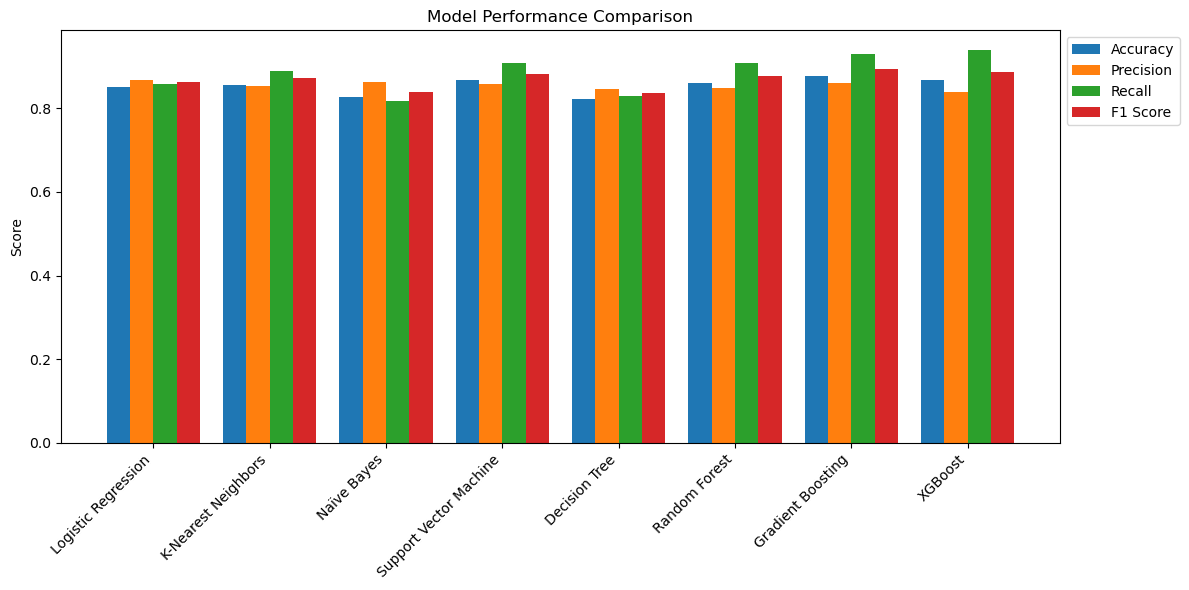

In [35]:
import matplotlib.pyplot as plt
import numpy as np


metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
model_names = eval_df.index
values = [eval_df[metric].values for metric in metrics]


bar_width = 0.2
x = np.arange(len(model_names))


fig, ax = plt.subplots(figsize=(12, 6))


for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width, values[i], bar_width, label=metric)


ax.set_xticks(x + bar_width * 1.5)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")


ax.legend(loc="upper left", bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()



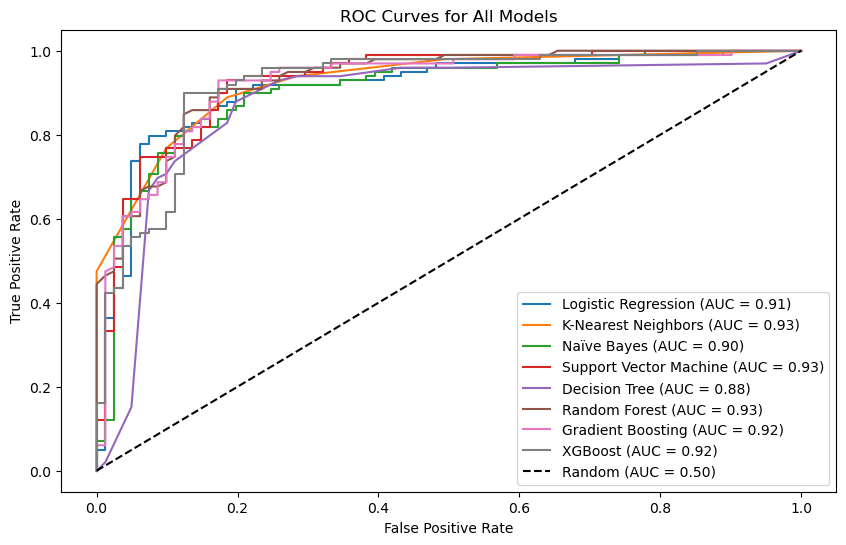

In [37]:
from sklearn.metrics import roc_curve, auc


plt.figure(figsize=(10, 6))


for name, preds in model_predictions.items():
    if preds["y_pred_proba"] is not None: 
        fpr, tpr, _ = roc_curve(y_test, preds["y_pred_proba"])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")


plt.plot([0, 1], [0, 1], "k--", label="Random (AUC = 0.50)")


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.show()


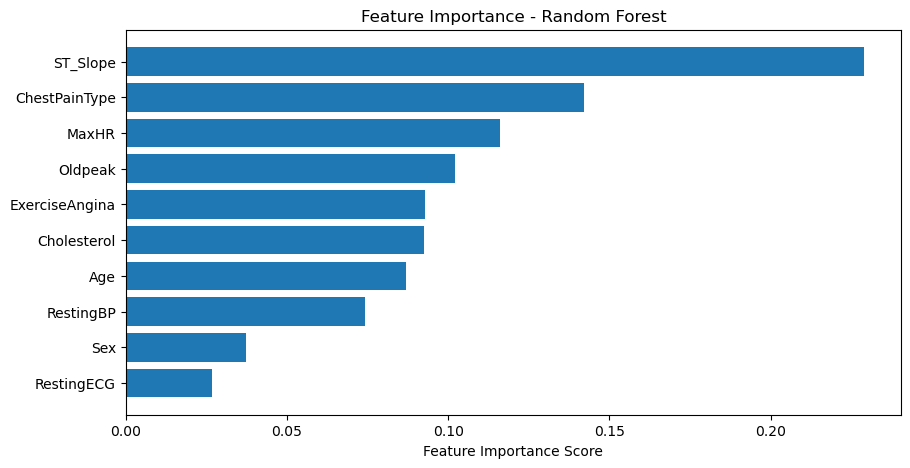

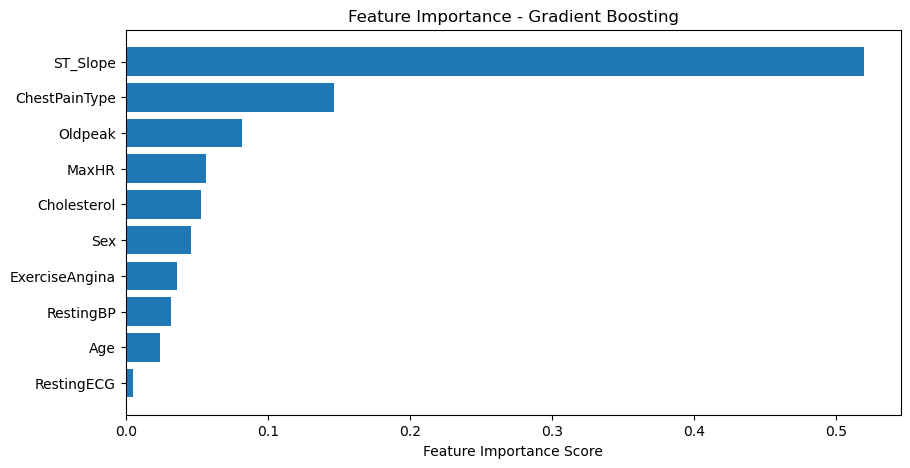

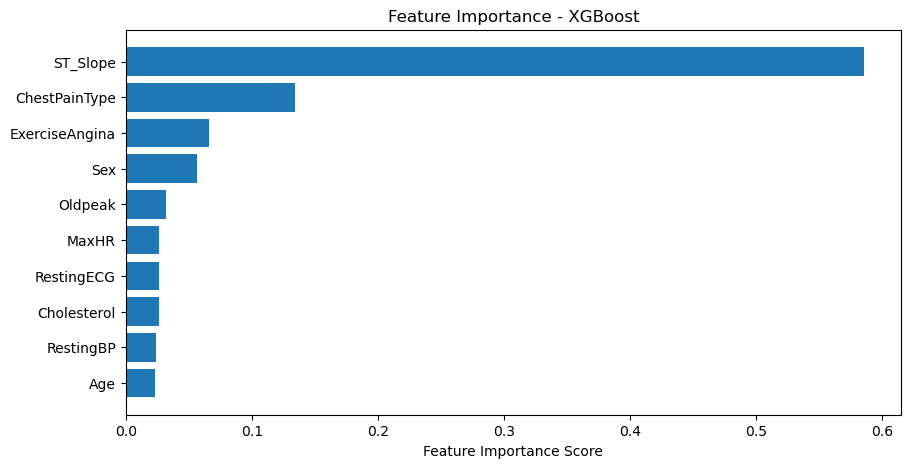

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


X_train_scaled = np.load("X_train_scaled.npy")
feature_names = pd.read_csv("cleaned_heart_disease_dataset.csv").drop(columns=['HeartDisease']).columns


models_with_importance = {
    "Random Forest": joblib.load("random_forest_model.pkl"),
    "Gradient Boosting": joblib.load("gradient_boosting_model.pkl"),
    "XGBoost": joblib.load("xgboost_model.pkl")
}


for model_name, model in models_with_importance.items():
    importance = model.feature_importances_
    sorted_idx = np.argsort(importance)[::-1] 

    plt.figure(figsize=(10, 5))
    plt.barh(range(len(feature_names)), importance[sorted_idx], align='center')
    plt.yticks(range(len(feature_names)), feature_names[sorted_idx])
    plt.xlabel("Feature Importance Score")
    plt.title(f"Feature Importance - {model_name}")
    plt.gca().invert_yaxis() 
    plt.show()


In [42]:
import pandas as pd


df = pd.read_csv("cleaned_heart_disease_dataset.csv")


st_slope_correlation = df.groupby("ST_Slope")["HeartDisease"].mean().sort_values(ascending=False)


print("\nProportion of Heart Disease Cases by ST-Slope Type:")
print(st_slope_correlation)



Proportion of Heart Disease Cases by ST-Slope Type:
ST_Slope
1    0.827051
0    0.770492
2    0.195876
Name: HeartDisease, dtype: float64


In [44]:
import scipy.stats as stats


contingency_table = pd.crosstab(df["ST_Slope"], df["HeartDisease"])


chi2, p, dof, expected = stats.chi2_contingency(contingency_table)


print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")


if p < 0.05:
    print("There is a statistically significant relationship between ST-Slope and Heart Disease.")
else:
    print("No significant relationship between ST-Slope and Heart Disease.")



Chi-Square Test Results:
Chi-Square Statistic: 348.5971
P-value: 0.0000
There is a statistically significant relationship between ST-Slope and Heart Disease.
